# Churn Prediction Project

The objective of this project is to develop a machine learning model that can predict customer churn in a telecommunications company. By analyzing customer data, usage patterns, and service-related information, we aim to identify customers who are likely to churn (cancel their subscription) and take proactive measures to retain them. Additionally, we want to gain insights into the key factors driving customer churn and understand the dynamics of customer behavior in the telecommunications industry.

Data Analysis Objective:
In addition to building a predictive model, the project focuses on conducting comprehensive data analysis to answer critical questions and extract meaningful insights about customer churn. By exploring the data, we can uncover patterns, correlations, and potential indicators of churn, allowing us to develop strategies and initiatives to reduce customer attrition rates.

**Throughout the project, aim to answer the following questions through data analysis and modeling:**

* What are the key factors driving customer churn in the telecommunications industry?
* Which customer segments are more likely to churn?
* How do different services, contract terms, or payment methods impact churn rates?
* Can we identify any early warning signs or indicators of customer churn?
* What are the most effective strategies for customer retention?
* How accurate is our predictive model in identifying customers who are likely to churn?

# About Dataset

**Context**

Kaggle link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

* customerID : Customer ID
* gender : Whether the customer is a male or a female
* SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents : Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit   card (automatic))
* MonthlyCharges : The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn : Whether the customer churned or not (Yes or No)

# Import our dependencies

** I prefer to import my dependencies on a current need basis, so we will start on importing the generally used ones **

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Let's get an overview of our data

In [279]:
telco=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [122]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyChargeRange'],
      dtype='object')

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges column is of Dtype: object, when it should be float rather. We will fix and investigate this

# Data Cleaning

we will check if there is any missing data and correct any Dtype errors such as the TotalCharges column

<Axes: >

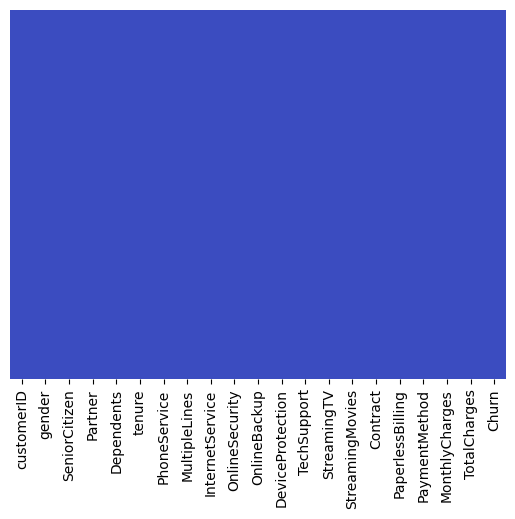

In [9]:
# Create a heatmap showing whether there is any missing data 
sns.heatmap(telco.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

Now let's convert the TotalCharges column into a float Dtype 

In [268]:
telco['TotalCharges']=telco['TotalCharges'].astype('float64')

ValueError: could not convert string to float: ' '

In [280]:
# Convert 'TotalCharges' column to float64 data type
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [270]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


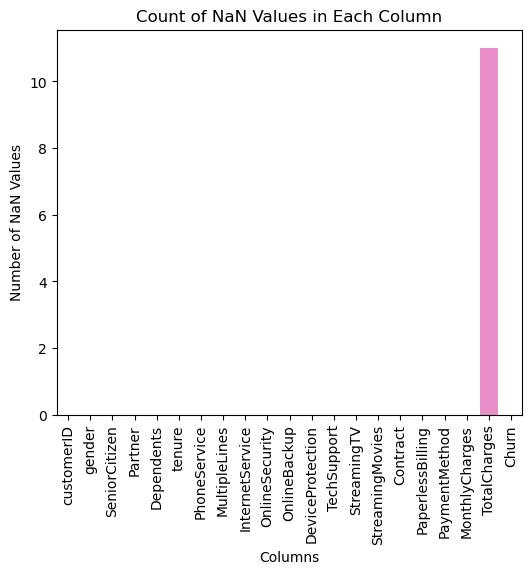

In [281]:
# Check for NaN values in the entire DataFrame
nan_values = telco.isnull()

# Count the number of NaN values in each column
nan_counts = nan_values.sum()


# Create a bar plot to visualize the count of NaN values for each column using Seaborn
plt.figure(figsize=(6, 5))
sns.barplot(x=nan_counts.index, y=nan_counts)
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('Count of NaN Values in Each Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [282]:
# Drop the NaN values from the 'TotalCharges' column in 'telco'
telco.dropna(subset=['TotalCharges'], inplace=True)

In [283]:
# Check for NaN values in the entire DataFrame
nan_values = telco.isnull()

# Count the number of NaN values in each column
nan_counts = nan_values.sum()

# Display the count of NaN values for each column
print(nan_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Data Analysis

In [44]:
from pandas_profiling import ProfileReport

In [48]:
# Generate a pandas profiling report
profile = ProfileReport(telco, title='Telco Profiling Report', explorative=True,dark_mode=True)

# Save the report to an HTML file
profile.to_file("Telco_profiling_report.html")

# View the profile
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

** From the Telco profile, we can see that TotalCharges,MonthlyCharges,Contract and tenure are the most important features based on their correlation with the Target Variable Churn **

### What percentage of our customers are churning?

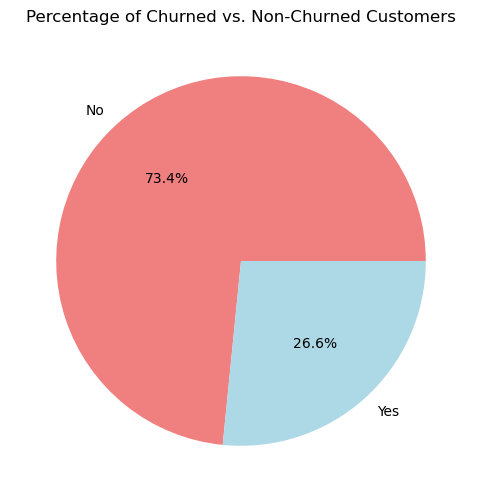

Approximately 27% of customers are churning


In [50]:
# Calculate the percentage of churned and non-churned customers
churn_counts = telco['Churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

# Create a pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(churn_percentages, labels=churn_percentages.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Percentage of Churned vs. Non-Churned Customers')
plt.show()

print('Approximately 27% of customers are churning')

In [69]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Segmenting the customer Base

*I will analyse the customer base by first grouping them into 5 categories, then selecting the most influential columns within each category to feed into a clustering algorithm that will officially segment the customer base to analyse which segments of the customer base is most likely to churn.*



Based on the potential relationships among the columns, we can group them into several categories:

1. Family Status:
   - SeniorCitizen
   - Partner
   - Dependents

2. Services and Subscriptions:
   - PhoneService
   - MultipleLines
   - InternetService
   - OnlineSecurity
   - OnlineBackup
   - DeviceProtection
   - TechSupport
   - StreamingTV
   - StreamingMovies

3. Contract and Billing:
   - Contract
   - PaperlessBilling
   - PaymentMethod

4. Usage and Charges:
   - Tenure
   - MonthlyCharges
   - TotalCharges

5. Churn Status:
   - Churn

These groupings are based on the nature of the variables and potential relationships they might have with each other. Demographic information like SeniorCitizen, Gender, Partner, and Dependents might be related to customer behavior, as might be the various services and subscriptions. Contract and billing-related features may provide insights into customer loyalty, while usage and charges can help in understanding customer spending patterns. Finally, Churn is the target variable that indicates whether the customer churned or not, making it the central focus of analysis and prediction.

In [111]:
# A function to help write the code/analysis for each segmentation/group to improve the readability of the code

# Categories within segment are:
family_status=['SeniorCitizen','Partner', 'Dependents']
ServicesnSubscriptions = ['PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
ContractnBilling=['Contract','PaperlessBilling','PaymentMethod']
UsagenCharges=['tenure','MonthlyCharges','TotalCharges']

        
    
def Segmentation_Analysis(segment,palette,plot_type):
    # Set the color palette
    sns.set_palette(palette)

    # Iterate through each family status column
    for column in segment:
        # Create a cross-tabulation of churn and the categorical column to segment the data
        cross_tab = pd.crosstab(telco[column], telco['Churn'], normalize='index')
        
        # Plot the stacked bar plot
        cross_tab.plot(kind=plot_type, stacked=True)
        
        # Set the plot title, x-axis label, and y-axis label
        plt.title(f'Churn Rates by {column}  ')
        plt.xlabel(column)
        plt.ylabel('Churn Rate')
        
    # Show the plot
    plt.show()




### Analysis by Family Status - Churn Rate Insights

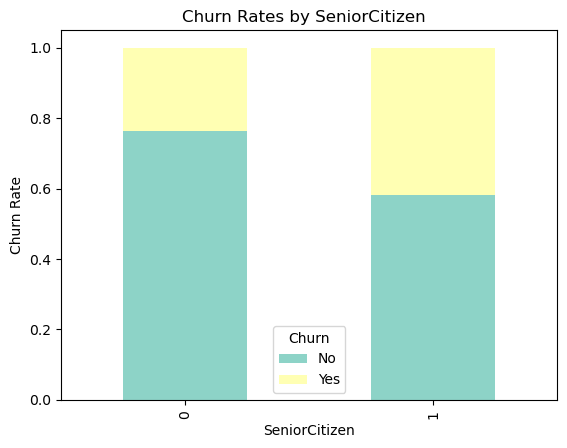

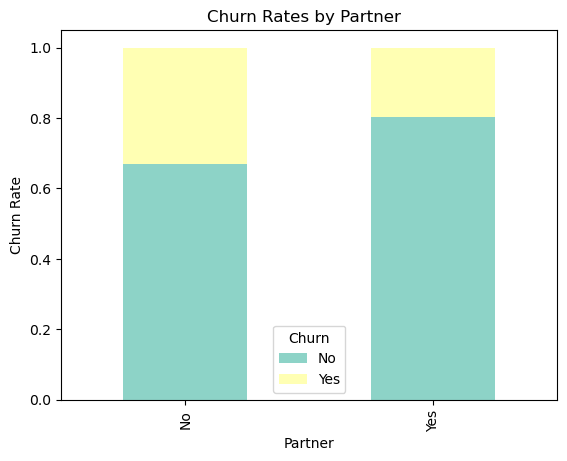

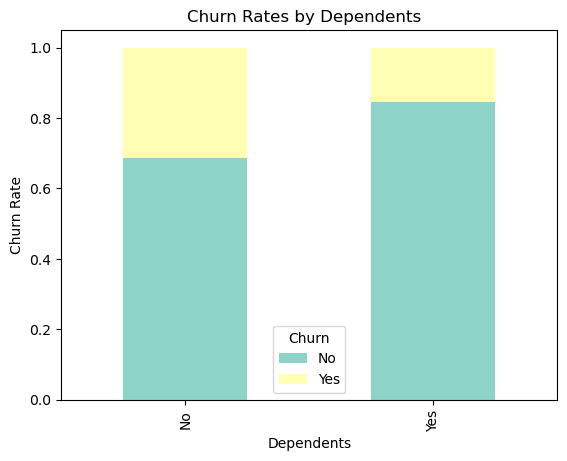

In [106]:
# countplot showing distribution of churn by each family status

Segmentation_Analysis(family_status, 'Set3','bar') 


#### Insights

**Family Status (SeniorCitizen, Partner, Dependents):**

- Problem: Customers without dependents have a higher churn rate.
- Possible Reason: Lack of family-oriented plans or benefits.
- Recommendation: Develop family-centric plans and benefits to cater to customers without dependents. Offer discounts or bundled services that cater to the needs of families. Implement targeted marketing campaigns to promote these plans and highlight the value they provide to customers without dependents.

### Analysis by Services and Subscriptions - Churn Rate Insights

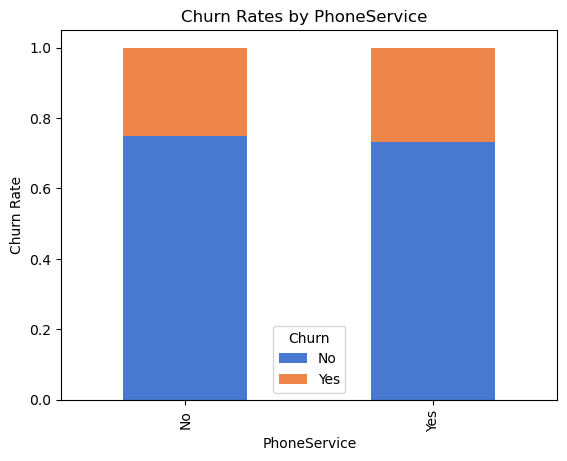

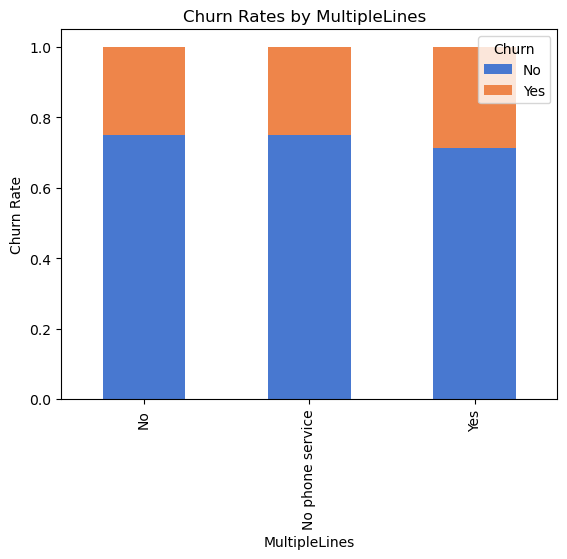

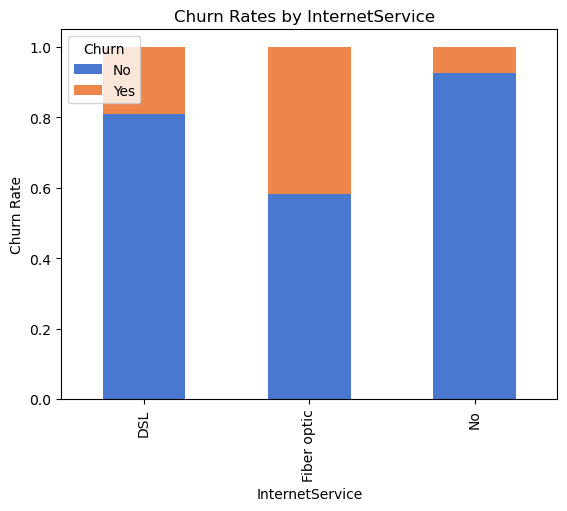

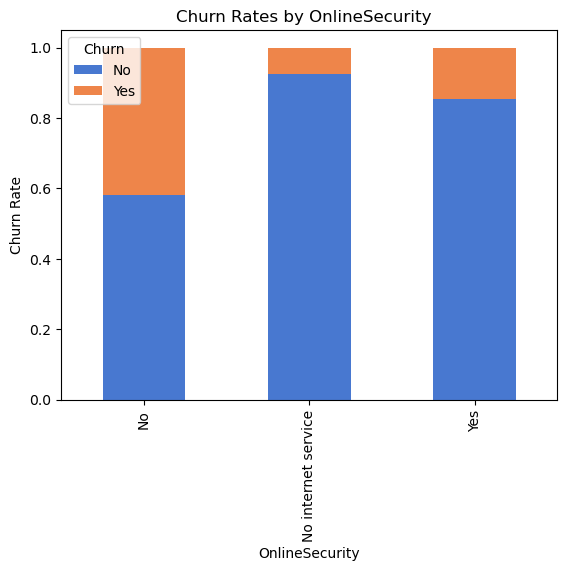

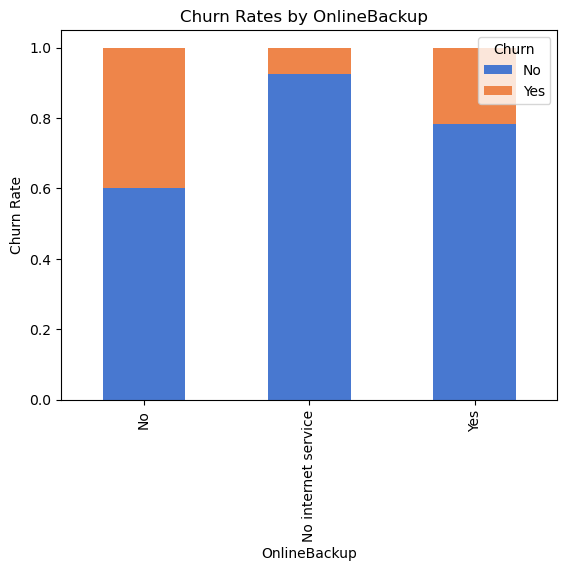

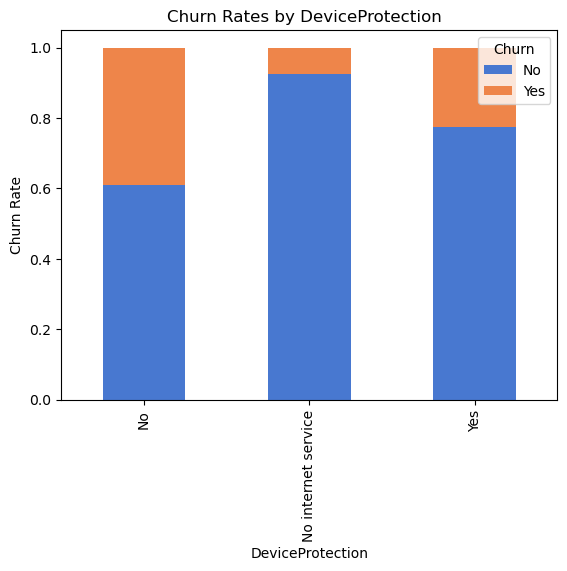

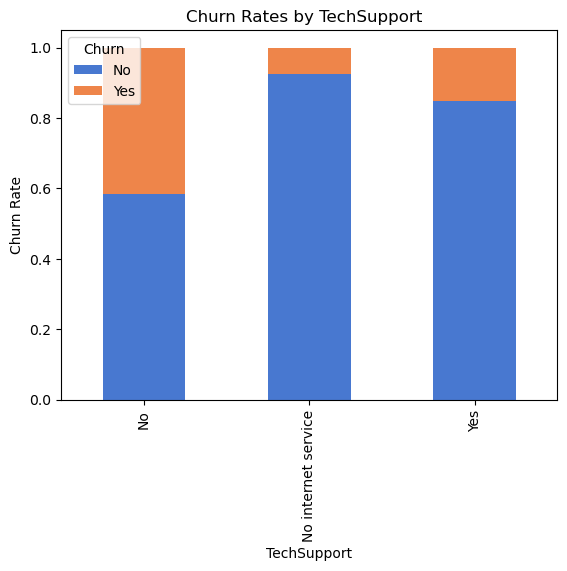

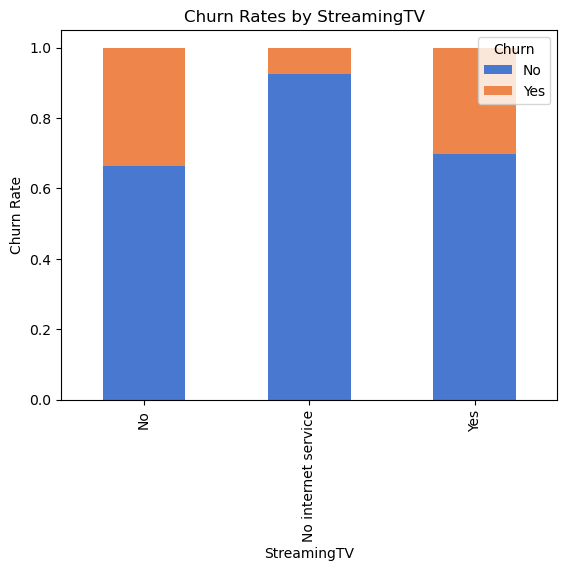

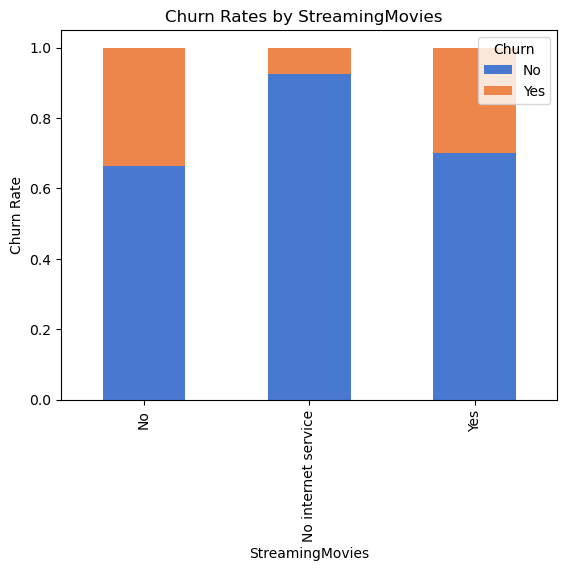

In [103]:
Segmentation_Analysis(ServicesnSubscriptions, 'muted','bar') 

#### Insights

**Services and Subscriptions (PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):**

- Problem: Customers without certain services (OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection) have a higher churn rate.
- Possible Reason: Lack of comprehensive support and protection.
- Recommendation: Highlight the importance of these services in customer communications and marketing materials. Educate customers about the benefits of these services in terms of data security, technical assistance, and device protection. Offer attractive packages or incentives to encourage customers to opt for these services.

### Analysis by Contract and Billing -  Churn Rate Insights

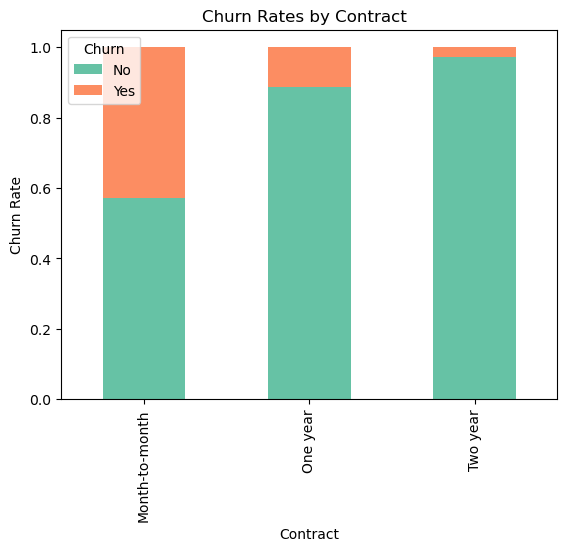

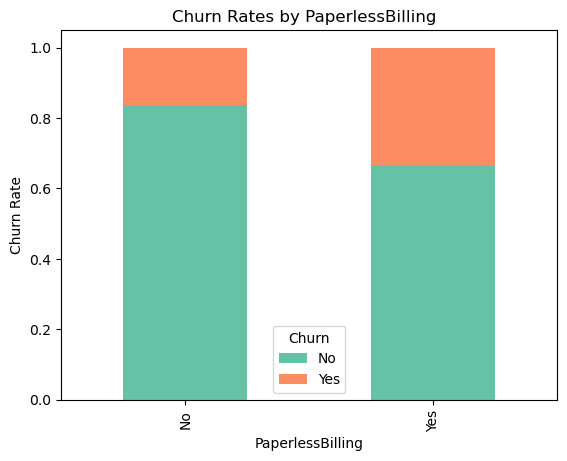

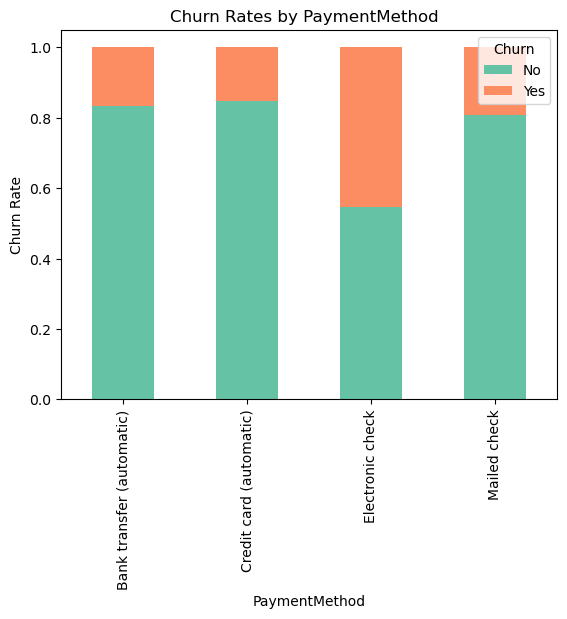

In [100]:
Segmentation_Analysis(ContractnBilling, 'Set2','bar') 

#### Insights 

**Contract and Billing (Contract, PaperlessBilling, PaymentMethod):**

- Problem: Customers with month-to-month contracts have a higher churn rate.
- Possible Reason: Lack of commitment or incentives.
- Recommendation: Encourage customers to sign longer-term contracts by offering incentives such as discounted pricing, exclusive features, or loyalty rewards. Communicate the benefits of longer-term contracts, such as price stability and additional perks, to showcase the value and encourage customer retention.

#### Takeaway

Selected columns to use for clustering: 'SeniorCitizen','Partner','Dependents','tenure','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn','MonthlyChargeRange'
1. Dependents:
   - Problem: Customers without dependents have a higher churn rate.
   - Possible Reason: Lack of family-oriented plans or benefits.
   - Recommendation: Develop family-centric plans and benefits to cater to customers without dependents. Offer discounts or bundled services that cater to the needs of families. Implement targeted marketing campaigns to promote these plans and highlight the value they provide to customers without dependents.

2. Internet Service:
   - Problem: Customers with fiber optic Internet service have a higher churn rate.
   - Possible Reason: Performance or reliability issues with fiber optic service.
   - Recommendation: Invest in infrastructure improvements to enhance the quality, stability, and performance of fiber optic Internet service. Conduct regular maintenance and address any service-related issues promptly. Communicate these improvements to customers to instill confidence and encourage retention.

3. Online Security, Tech Support, Online Backup, Device Protection:
   - Problem: Customers without these services have a higher churn rate.
   - Possible Reason: Lack of comprehensive support and protection.
   - Recommendation: Highlight the importance of these services in customer communications and marketing materials. Educate customers about the benefits of these services in terms of data security, technical assistance, and device protection. Offer attractive packages or incentives to encourage customers to opt for these services.

4. Streaming Services:
   - Problem: not utilizing streaming TV and streaming movies does not seem to impact churn rates compared to using.
   - Possible Reason: Inadequate content or user experience.
   - Recommendation: Enhance the streaming services by expanding the content library, securing licensing agreements for popular shows and movies, and investing in user experience improvements. Personalize recommendations to cater to individual preferences and increase engagement. Regularly update the content to keep customers interested and satisfied.

5. Contract:
   - Problem: Customers with month-to-month contracts have a higher churn rate.
   - Possible Reason: Lack of commitment or incentives.
   - Recommendation: Encourage customers to sign longer-term contracts by offering incentives such as discounted pricing, exclusive features, or loyalty rewards. Communicate the benefits of longer-term contracts, such as price stability and additional perks, to showcase the value and encourage customer retention.

6. Paperless Billing:
   - Problem: Customers opting for paperless billing have a higher churn rate.
   - Possible Reason: Performance or reliability issues with Paperless Billing service.
   - Cheaper Recommendation: Invest in infrastructure improvements to enhance the quality, stability, and performance of Paperliss Billing service. Conduct regular maintenance and address any service-related issues promptly. Communicate these improvements to customers to instill confidence and encourage retention.

7. Payment Method:
   - Problem: Customers using electronic check as a payment method have a higher churn rate.
   - Possible Reason: Inconvenience or lack of preferred payment options.
   - Recommendation: Promote alternative payment methods such as credit cards or bank transfers that offer convenience and flexibility. Highlight the security measures and ease of use associated with these payment methods. Offer incentives, such as cashback or loyalty points, for customers who switch to preferred payment options.

By implementing these recommendations, the company can address specific challenges and improve customer satisfaction, loyalty, and retention. These strategies aim to meet customer needs, enhance the overall customer experience, and reduce churn rates.

### Analysis by Usage and Charges -  Churn Rate Insights 

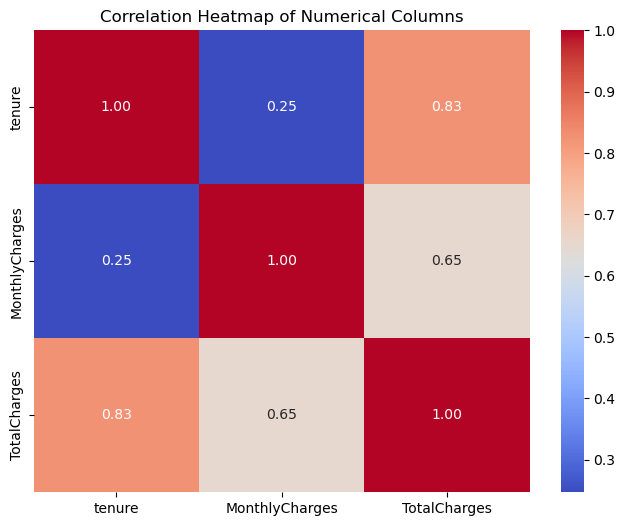

In [108]:
# Create a correlation matrix
correlation_matrix = telco[UsagenCharges].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Usage and Charges')
plt.show()

tenure and monthly charges seem to not be linearly related with a low correlation of 0.25, that suggests other relationships should be investigated

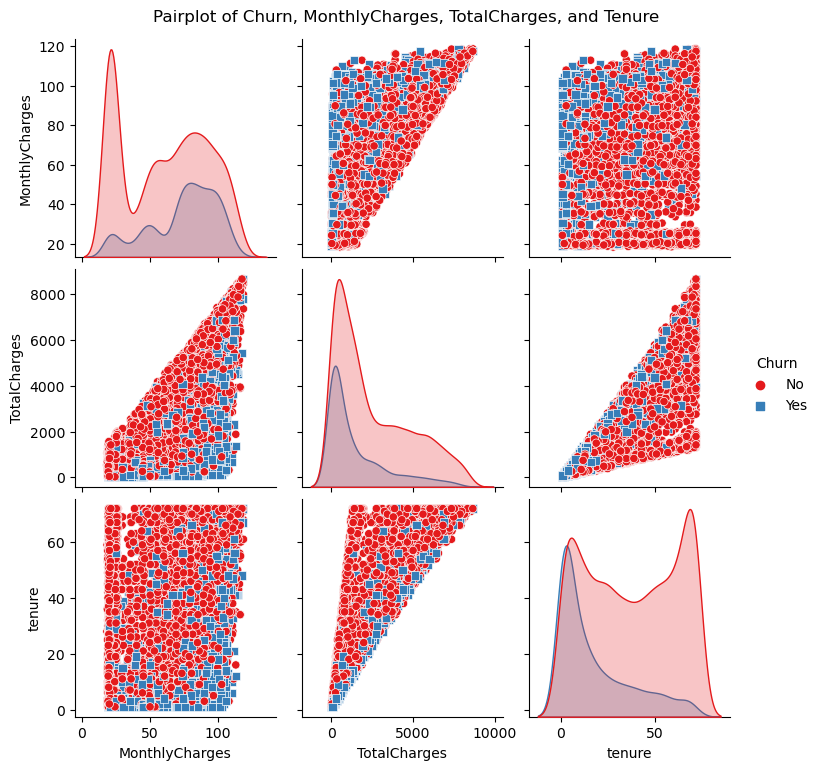

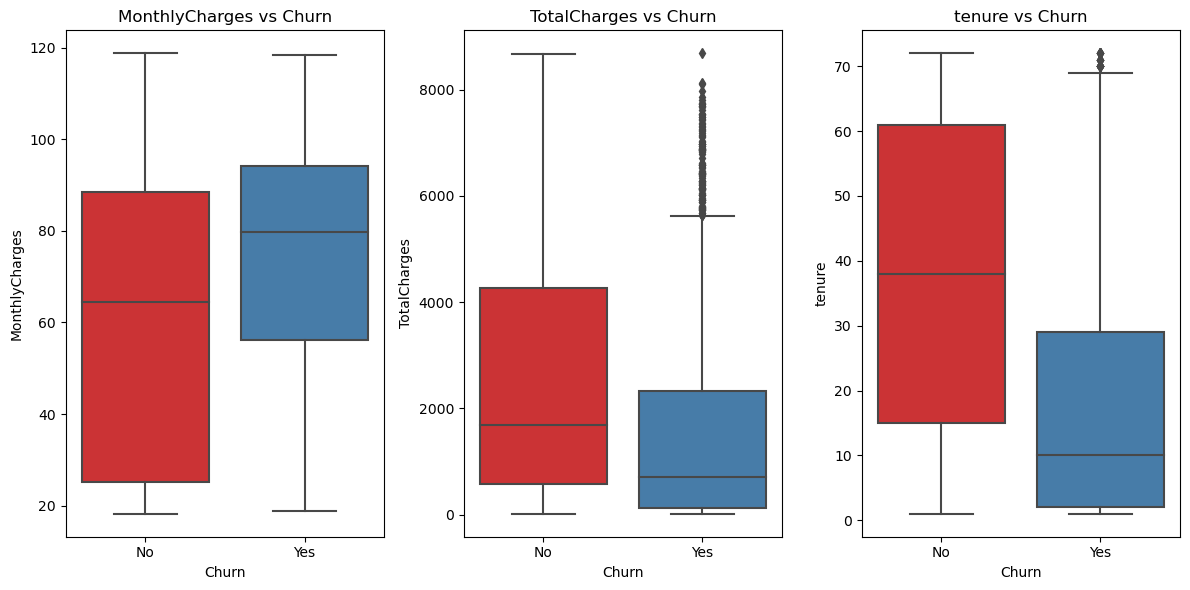

In [109]:
columns = ['Churn', 'MonthlyCharges', 'TotalCharges', 'tenure']

# Pairplot to show relationships between numerical columns
sns.pairplot(telco[columns], hue='Churn', diag_kind='kde', markers=['o', 's'], palette='Set1')
plt.suptitle('Pairplot of Churn, MonthlyCharges, TotalCharges, and Tenure', y=1.02)
plt.show()

# Boxplot to show the distribution of each numerical column by Churn status
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns[1:]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Churn', y=column, data=telco, palette='Set1')
    plt.title(f'{column} vs Churn')
plt.tight_layout()
plt.show()

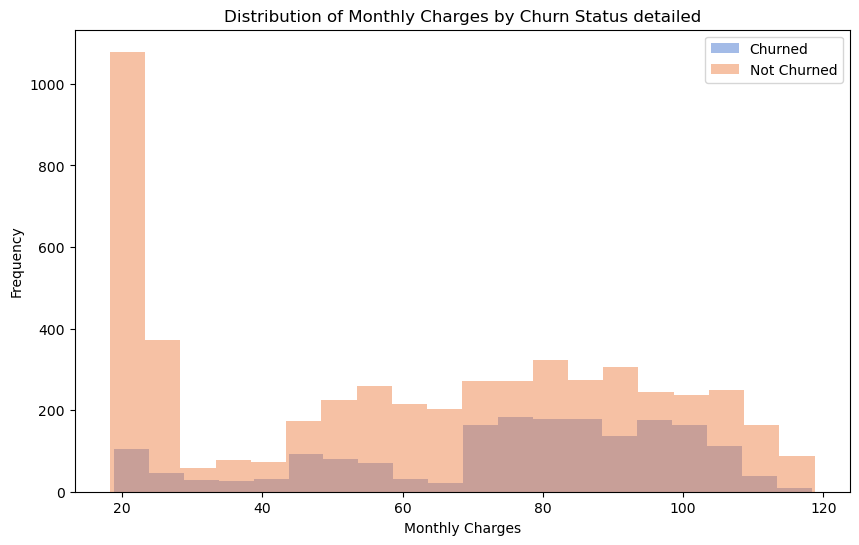

In [285]:
plt.figure(figsize=(10, 6))

churned_df = telco[telco['Churn'] == 'Yes']
not_churned_df = telco[telco['Churn'] == 'No']

# overlay this with not churned df to compare the skewness of each
plt.hist(churned_df['MonthlyCharges'], bins=20, alpha=0.5, label='Churned')
plt.hist(not_churned_df['MonthlyCharges'], bins=20, alpha=0.5, label='Not Churned')

plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges by Churn Status detailed')
plt.legend()

plt.show()


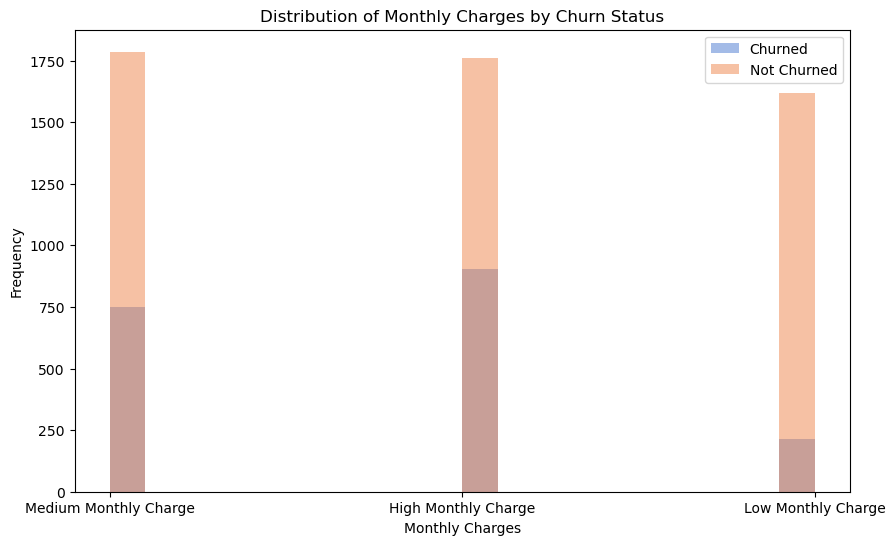

In [286]:
plt.figure(figsize=(10, 6))

churned_df = telco[telco['Churn'] == 'Yes']
not_churned_df = telco[telco['Churn'] == 'No']

# Define the bins and labels for each range
bins = [0, 40, 80, 120]
labels = ['Low Monthly Charge', 'Medium Monthly Charge', 'High Monthly Charge']

# Create a new column 'MonthlyChargeRange' to store the range information
telco['MonthlyChargeRange'] = pd.cut(telco['MonthlyCharges'], bins=bins, labels=labels)


# overlay this with not churned df to compare the skewness of each
plt.hist(churned_df['MonthlyChargeRange'], bins=20, alpha=0.5, label='Churned')
plt.hist(not_churned_df['MonthlyChargeRange'], bins=20, alpha=0.5, label='Not Churned')

plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.legend()

plt.show()


### Insights
From the histogram we can see that there is a significant overlap between churned and not churned customers in the high and mid-range of monthly charges (around 70-100). This indicates that customers within this range are not strongly influenced by monthly charges alone when it comes to churn decisions, but it is indeed a factor.

However, there is a distinct difference in the non-overlapping areas. In the lower range of monthly charges (below 40), the frequency of not churned customers is notably higher compared to the  churned customers. This suggests that customers with lower monthly charges are more prone to being loyal, possibly due to factors such as affordability , satisfaction with service quality.


Based on this insight, we can make the following **recommendations:**

Targeted Retention Strategies: Implement targeted retention strategies for customers in the lower range of monthly charges. This may involve addressing affordability concerns, improving service quality, or offering tailored promotions to enhance the value proposition.

Value Enhancement: Focus on enhancing the perceived value for customers in the mid-range of monthly charges. This can be achieved by offering additional benefits, improving customer experience, or introducing loyalty programs to increase engagement and reduce churn risk.

**Further analysis questions that can be explored based on this insight include:**

Are there specific services or features associated with higher churn rates in the lower range of monthly charges? Identifying and addressing pain points in these areas could help mitigate churn.

What factors contribute to the higher perceived value and lower churn rates in the higher range of monthly charges? Understanding these factors can guide efforts to replicate their success and improve customer satisfaction across all price ranges.

Are there any notable differences in customer demographics or usage patterns between the overlapping and non-overlapping areas? Exploring these differences can provide deeper insights into the varying churn dynamics and inform targeted retention strategies.

By focusing on these insights and recommendations, the company can develop targeted initiatives to reduce churn, optimize pricing strategies, and enhance the overall customer experience, ultimately leading to improved customer satisfaction and loyalty.

### What Customer Segments are more likely to Churn?

**Note**

Our current dataframe is mostly made up of categorical columns, which a machine learning algorithm cannot process, I will label encode all categorical columns in the telco dataframe to allow the clustering algorithm to be able to process it

** Label encoding is a process of converting categorical variables into numerical labels, allowing algorithms to process the data as numbers, facilitating analysis and machine learning models that require numerical inputs.**

In [278]:
from sklearn.preprocessing import LabelEncoder

In [300]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [ 'gender','SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn','MonthlyChargeRange']

# Create a copy of the telco dataframe which will be encoded
telco_label_encoded=telco.copy()
# Iterate through each categorical column
for column in categorical_columns:
    # Encode the values in the current column
    telco_label_encoded[column] = label_encoder.fit_transform(telco_label_encoded[column])

# Display the updated DataFrame with encoded values
telco_label_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyChargeRange
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,1,2
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,1,2


customerID is not a particularly useful variable for the ml model so let's drop it to avoid any misleading

In [301]:
columns_dropped=['customerID','MonthlyChargeRange']
telco_label_encoded=telco_label_encoded.drop(columns_dropped,axis = 1)
telco_label_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Scale the data:** If your data has features with different scales (e.g., one feature is in the range of 0-1 while another is in the range of 100-1000), it can make it harder for the algorithm to find the solution. Scaling the data can help in this case.

** It is important to scale only the numerical columns as scaling categorical variables may distort the information they carry. **

In [302]:
from sklearn.preprocessing import MinMaxScaler

# Scale only the numerical columns as scaling categorical variables may distort the information they carry.
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a scaler object
scaler = MinMaxScaler()

# Create a copy of the telco_encoded dataframe which will have its numerical columns scaled
telco_label_encoded_scaled=telco_label_encoded.copy()

# Apply scaling to the numerical columns
telco_label_encoded_scaled[numerical_columns] = scaler.fit_transform(telco_label_encoded_scaled[numerical_columns])

# Display the updated DataFrame
telco_label_encoded_scaled.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


To identify customer segments more likely to churn, we need clustering, specifically K-means clustering. K-means clustering groups similar customers together based on selected features (e.g., contract, monthly charges) and assigns them to clusters. By clustering customers, we can discover patterns and distinguish segments with higher churn rates.

K-means works by iteratively assigning data points to the nearest cluster center and then updating the cluster centers based on the mean of the assigned points. This process continues until convergence, optimizing the within-cluster sum of squares.

To choose the best K value (number of clusters), we use the "Elbow Method." The method plots the variance explained against different K values. The optimal K value is where the variance explained starts to level off, forming an "elbow." This value provides the most meaningful segmentation for the churn analysis.

/Users/peteroroh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/peteroroh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/peteroroh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/peteroroh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

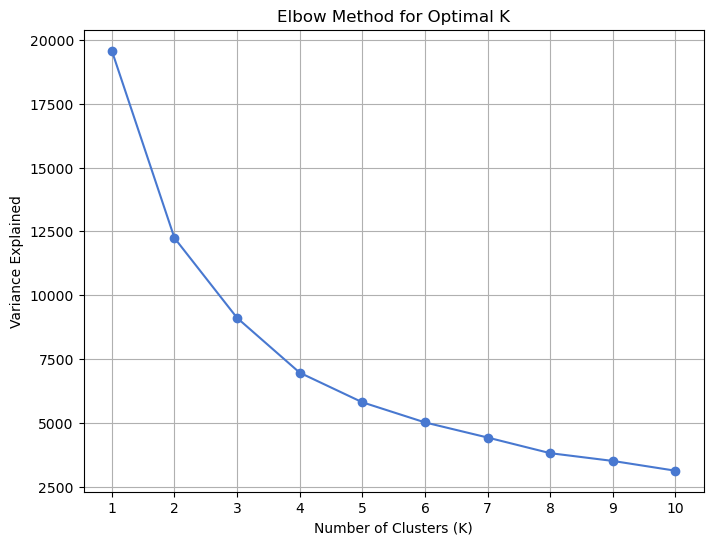

In [305]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
selected_features = ['tenure','PaymentMethod','TechSupport','Contract','MonthlyCharges']

# Create a new DataFrame with selected features
X = telco_label_encoded_scaled[selected_features]

# Initialize an empty list to store the variance explained by each number of clusters
variance_explained = []

# Define a range of K values to try (e.g., from 1 to 10)
K_range = range(1, 11)

# Perform K-means clustering for each K value and calculate variance explained
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    variance_explained.append(kmeans.inertia_)

# Plot the variance explained against the number of clusters (K)
plt.figure(figsize=(8, 6))
plt.plot(K_range, variance_explained, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance Explained')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


** We will use a K(n_clusters) of 4 as when thats when the 'Elbow' begins to form. **

In [306]:
# Select relevant features for clustering
selected_features = ['tenure','PaymentMethod','TechSupport','Contract','MonthlyCharges']

# Create a new DataFrame with selected features
X = telco_label_encoded_scaled[selected_features]

# Apply K-means clustering with a chosen number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
telco_label_encoded_scaled['Cluster'] = kmeans.fit_predict(X)

# Calculate churn rate within each cluster
churn_rates = telco_label_encoded_scaled.groupby('Cluster')['Churn'].mean()

# Print the churn rates for each cluster
print(churn_rates)


Cluster
0    0.160759
1    0.076366
2    0.485888
3    0.264945
Name: Churn, dtype: float64


/Users/peteroroh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [307]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to view the cluster centers along with feature names
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)

# Print the DataFrame to see the characteristics of each cluster
print(cluster_centers_df)


     tenure  PaymentMethod  TechSupport  Contract  MonthlyCharges
0  0.374653       2.696643     1.484484  0.784674        0.299249
1  0.713688       0.576602     1.703064  1.449582        0.467801
2  0.263692       2.218845     0.029961  0.154581        0.536367
3  0.466535       0.487085     0.095941  0.476015        0.523628


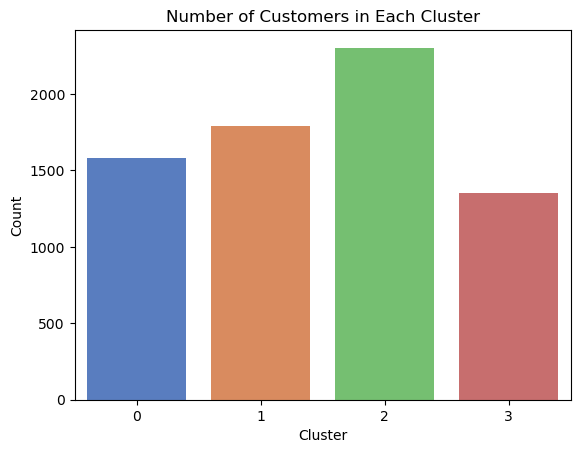

In [309]:
sns.countplot(x='Cluster', data=telco_label_encoded_scaled)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Customers in Each Cluster')
plt.show()

Based on the clustering analysis:

Cluster 0: 
- Churn Rate: 16.08%
- Characteristics: Customers in this cluster have a moderate tenure, predominantly use Electronic Checks as their payment method, have minimal tech support, and mostly prefer shorter-term contracts.

Cluster 1: 
- Churn Rate: 7.64%
- Characteristics: Customers in this cluster have a higher tenure, prefer multiple payment methods, have access to tech support, and often opt for longer-term contracts.

Cluster 2: 
- Churn Rate: 48.59%
- Characteristics: Customers in this cluster have a lower tenure, mostly use Electronic Checks, have minimal tech support, and tend to prefer shorter-term contracts.

Cluster 3: 
- Churn Rate: 26.49%
- Characteristics: Customers in this cluster have a moderate tenure, prefer multiple payment methods, have minimal tech support, and prefer shorter-term contracts.

Insights: 
- Cluster 1 has the lowest churn rate, indicating that customers with higher tenure, access to tech support, and longer-term contracts are less likely to churn.
- Cluster 2 has the highest churn rate, suggesting that customers with lower tenure and a preference for shorter-term contracts are more likely to churn.
- Payment method 2 (Electronic Checks) seems to be associated with higher churn rates in some clusters, indicating the importance of exploring alternative payment options for those customers.

Further analysis and targeted strategies for each cluster could help improve customer retention and reduce churn.

# Building our Model to predict Customer Churn

Customer churn prediction using machine learning is a valuable approach to identify customers who are likely to leave a business, enabling proactive retention strategies. Several commonly used models for customer churn prediction include:

• **Logistic Regression:** Widely used due to its simplicity and interpretability. It's effective when the relationship between features and churn is approximately linear.

• **Random Forest Classifier:** Offers high accuracy and handles non-linear relationships well. It can handle a large number of features and is robust to overfitting.

• **Gradient Boosting Classifier:** Known for its excellent predictive power and ability to handle complex relationships between features and churn. It creates a strong ensemble of decision trees.

• **Support Vector Machines (SVM):** Effective for high-dimensional data and can capture complex decision boundaries between churn and features.

## Data Preprocessing

Our current dataframe is mostly made up of categorical columns, which a machine learning algorithm cannot process, I will one hot encode all categorical columns instead of label encoding, so I can capture the true relationship between each category and the target variable. 

** One-hot encoding is a process of converting categorical data into a binary format, where each category is represented as a separate binary feature, mainly used to enable machine learning algorithms to work with categorical data, as they require numerical inputs.**

In [336]:
# re-read and clean telco dataframe to get a fresh df for one-hot encoding

telco=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' column to float64 data type
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

# Drop the NaN values from the 'TotalCharges' column in 'telco'
telco.dropna(subset=['TotalCharges'], inplace=True)

telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Drop some of the columns to avoid high dimensionality in the one hot encoded data

In [337]:
Dummycolsdropped=['customerID','gender', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']
telco_hot_encoded=telco.drop(Dummycolsdropped,axis = 1)
telco_hot_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [312]:
telco_hot_encoded.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [338]:
# Specify categorical columns to one hot encode from
cat_columns = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# One hot encode for those columns with drop_first=True
telco_hot_encoded = pd.get_dummies(telco_hot_encoded, columns=cat_columns, drop_first=False)

telco_hot_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,2,53.85,108.15,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,2,70.70,151.65,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [319]:
telco_hot_encoded.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_No', 'Churn_Yes'],
      dtype='object')

In [339]:
# Drop the following columns to prevent multicolinearity issues
MCcolsdrop=['SeniorCitizen_0','Partner_No','Dependents_No','OnlineSecurity_No','OnlineSecurity_No internet service',
      'OnlineBackup_No', 'OnlineBackup_No internet service','DeviceProtection_No',
      'DeviceProtection_No internet service','TechSupport_No', 'TechSupport_No internet service',
      'PaperlessBilling_No','Churn_No']

telco_hot_encoded=telco_hot_encoded.drop(MCcolsdrop,axis = 1)

telco_hot_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2,53.85,108.15,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,1
3,45,42.30,1840.75,0,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


**Scale the data:** If your data has features with different scales (e.g., one feature is in the range of 0-1 while another is in the range of 100-1000), it can make it harder for the algorithm to find the solution. Scaling the data can help in this case.

** It is important to scale only the numerical columns as scaling categorical variables may distort the information they carry. **

In [340]:
from sklearn.preprocessing import MinMaxScaler

# Scale only the numerical columns as scaling categorical variables may distort the information they carry.
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a scaler object
scaler = MinMaxScaler()

# Create a copy of the telco_encoded dataframe which will have its numerical columns scaled
telco_hot_encoded_scaled=telco_hot_encoded.copy()

# Apply scaling to the numerical columns
telco_hot_encoded_scaled[numerical_columns] = scaler.fit_transform(telco_hot_encoded_scaled[numerical_columns])

# Display the updated DataFrame
telco_hot_encoded_scaled.head()


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.000000,0.115423,0.001275,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0.464789,0.385075,0.215867,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.014085,0.354229,0.010310,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,1
3,0.619718,0.239303,0.210241,0,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
4,0.014085,0.521891,0.015330,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,1


#### Select features to be fed into the ML algorithm

In [154]:
from sklearn.model_selection import train_test_split

In [323]:
telco_hot_encoded_scaled.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1',
       'Partner_Yes', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [342]:
columns_dropped=['Churn_Yes','TotalCharges']
X=telco_hot_encoded_scaled.drop(columns_dropped,axis=1)
y=telco_hot_encoded_scaled['Churn_Yes']

* Dropped TotalCharges due to high correlation with tenure, which could lead to multicollinearity issues.The info in TotalCharges is already partially captured by the tenure feature; by removing it, the model focuses on other relevant features, ensuring more accurate predictions for customer churn.

In [343]:
X.head()

,tenure,MonthlyCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1,0.464789,0.385075,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,0.014085,0.354229,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1
3,0.619718,0.239303,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0
4,0.014085,0.521891,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


In [329]:
telco_hot_encoded_scaled['Churn_Yes'].value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

**To combat dataset imbalance, we'll use random undersampling, creating a more balanced representation of churn and non-churn instances.**

In [344]:
# Split the data into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=101)


In [345]:
from imblearn.under_sampling import RandomUnderSampler

# Create the random undersampler
rus = RandomUnderSampler(random_state=42)

# Apply random undersampling to the training and validation sets
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
X_val_resampled, y_val_resampled = rus.fit_resample(X_val, y_val)


## Model Builiding

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

/var/folders/r3/503y_hxj44n5kc_m6tj51wxh0000gp/T/ipykernel_7158/274435926.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
/var/folders/r3/503y_hxj44n5kc_m6tj51wxh0000gp/T/ipykernel_7158/274435926.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


                          Model  Accuracy  Precision    Recall  F1 Score
0           Logistic Regression  0.755208   0.732227  0.804688  0.766749
1      Random Forest Classifier  0.753906   0.741935  0.778646  0.759848
2  Gradient Boosting Classifier  0.764323   0.734411  0.828125  0.778458
3        Support Vector Machine  0.753906   0.727273  0.812500  0.767528 





/var/folders/r3/503y_hxj44n5kc_m6tj51wxh0000gp/T/ipykernel_7158/274435926.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
/var/folders/r3/503y_hxj44n5kc_m6tj51wxh0000gp/T/ipykernel_7158/274435926.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


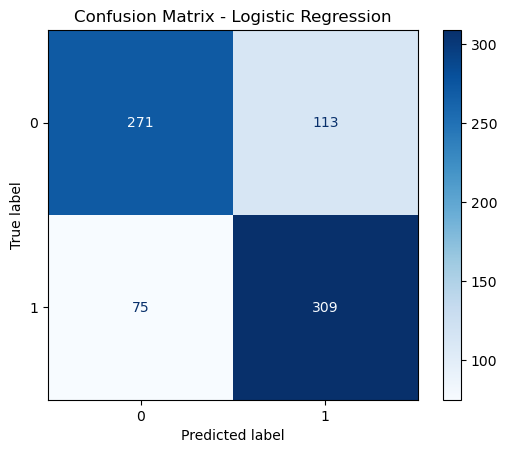

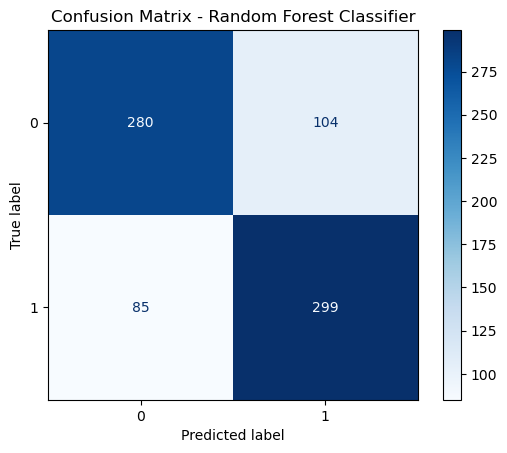

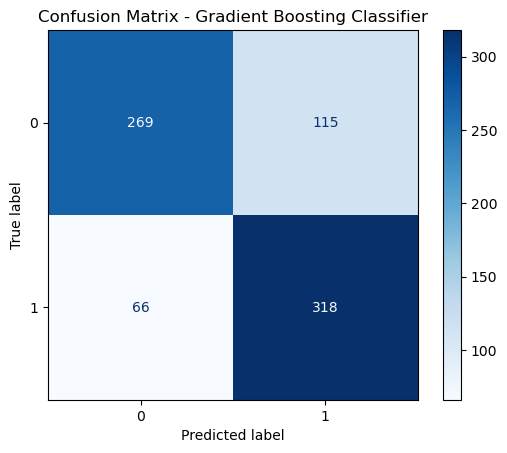

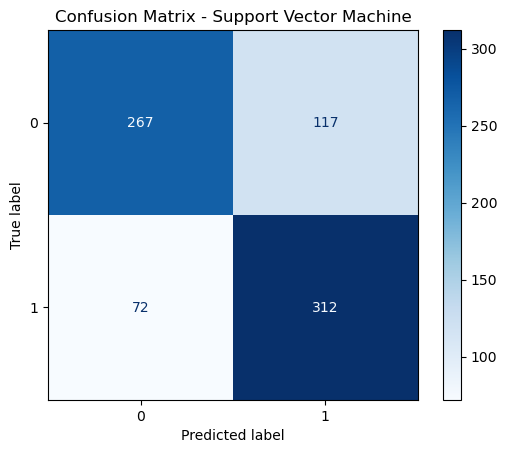

In [346]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC())
]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Loop through each model, fit, predict, and store the evaluation metrics on the validation set
for model_name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_val_resampled)
    accuracy = accuracy_score(y_val_resampled, y_pred)
    precision = precision_score(y_val_resampled, y_pred)
    recall = recall_score(y_val_resampled, y_pred)
    f1 = f1_score(y_val_resampled, y_pred)
    metrics_df = metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

    conf_matrix = confusion_matrix(y_val_resampled, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')

print(metrics_df, '\n\n\n')
plt.show()


In [333]:
def plot_feature_importance(model, feature_names):
    # Get feature importances or coefficients from the model
    if hasattr(model, 'feature_importances_'):
        importance_or_coef = model.feature_importances_
        plot_title = 'Feature Importance'
    elif hasattr(model, 'coef_'):
        importance_or_coef = model.coef_[0]
        plot_title = 'Coefficient'
    else:
        raise AttributeError("Model does not have feature importances or coefficients.")

    # Sort indices in descending order of importance or coefficients
    indices = importance_or_coef.argsort()[::-1]

    # Sort feature names accordingly
    sorted_feature_names = [feature_names[i] for i in indices]

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.bar(range(len(importance_or_coef)), importance_or_coef[indices])
    plt.xticks(range(len(importance_or_coef)), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance or Coefficient')
    plt.title(f'{plot_title} - {model.__class__.__name__}')

    # Add labels for each bar
    for i, v in enumerate(importance_or_coef[indices]):
        plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

    plt.show()


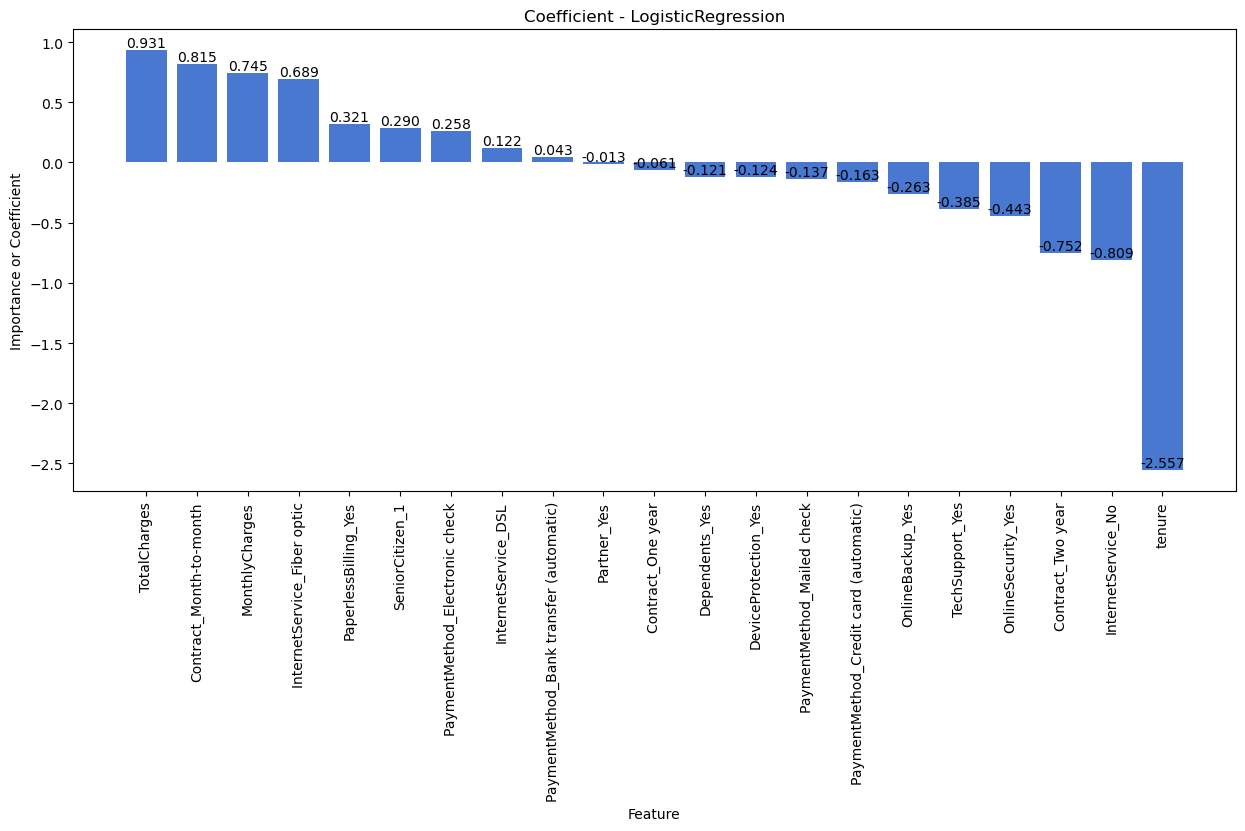

In [334]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
plot_feature_importance(logistic_model, X_train.columns)

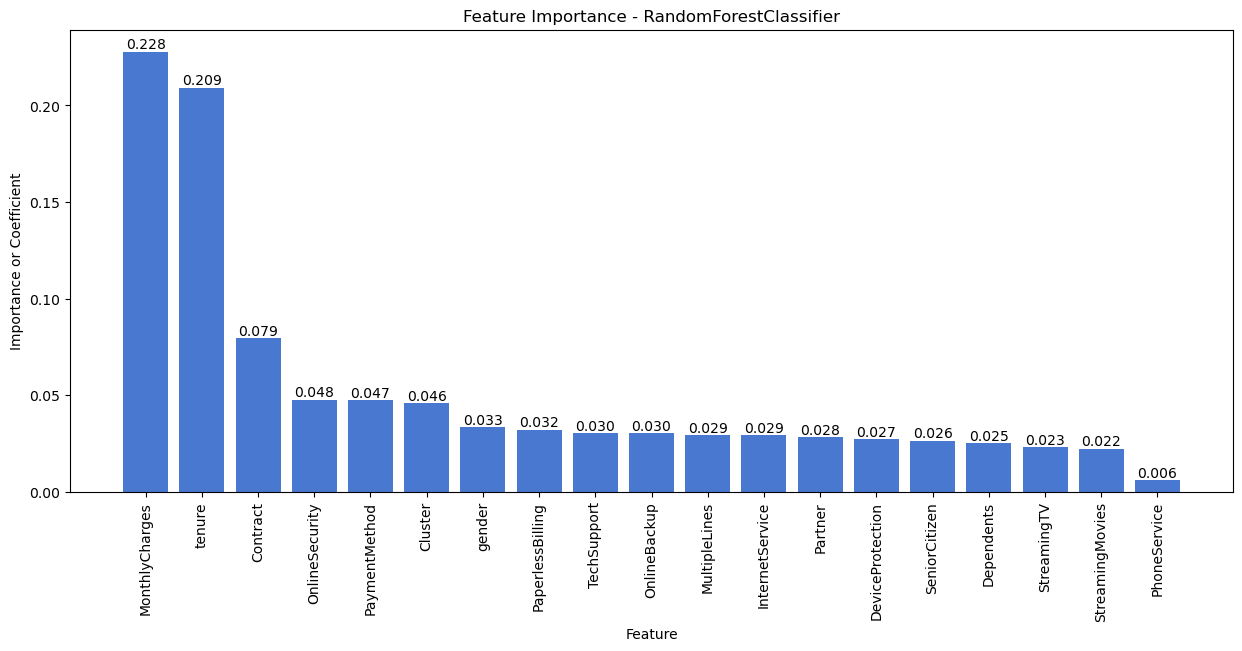

In [216]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
plot_feature_importance(rf_model, X_train.columns)

## Adjusting Feature Importance/ Hyperparameter Tuning

Hyperparameter adjustment is the process of fine-tuning settings or configurations of a machine learning model that are not learned during training. It is done to optimize the model's performance, and generalize better to unseen data. By adjusting hyperparameters, we can find the best combination that maximizes the model's effectiveness in making predictions and solving the specific task at hand.

### Random Forest Classifier
**Hyperparameter tuning**

In [221]:
from sklearn.model_selection import GridSearchCV

In [414]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [415]:
# Defining a parameter grid for hyperparameter tuning with different values to be tested for each hyperparameter
rf_param_grid = [{'n_estimators': [100, 200, 300], 'max_depth': [None,2,3,10,20], 'max_features': ['sqrt',2,4,8,16,'log2', None]}]

Let's break down the choices for the values in the `param_grid`:

1. `n_estimators`: This hyperparameter represents the number of trees in the Random Forest ensemble. By providing the values `[100, 200, 300]`, the grid search will consider three different values for the number of trees to test, namely 100, 200, and 300.

2. `max_depth`: This hyperparameter sets the maximum depth of each decision tree in the ensemble. A smaller value limits the depth of the trees, potentially preventing overfitting. The choices `[None, 2, 3, 10, 20]` indicate that the grid search will explore five options for the maximum depth: no limit (`None`), depth 2, depth 3, depth 10, and depth 20.

3. `max_features`: This hyperparameter determines the number of features to consider when looking for the best split at each node. By using different values, you can control the diversity and randomness in each tree. The choices include `'sqrt'` (square root of the total number of features), integer values `[2, 4, 8, 16]`, `'log2'` (log base 2 of the total number of features), and `None` (consider all features).

The purpose of providing multiple options for each hyperparameter is to let the grid search explore various combinations to find the optimal configuration that performs well on the validation set. By trying different values, the grid search helps in tuning the model to achieve better generalization and avoid overfitting. The specific choices made in the `param_grid` depend on the specific problem, the dataset, and the understanding of how these hyperparameters influence the performance of the Random Forest model.

In [416]:
# Perform the grid search
grid_search = GridSearchCV(rf_model, rf_param_grid,scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

Using `'roc_auc'` as the scoring metric in the grid search is a common choice for binary classification problems, especially when dealing with imbalanced datasets. ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric that evaluates the performance of a binary classifier by considering the trade-off between true positive rate (recall) and false positive rate.

In the context of customer churn prediction, the dataset is often imbalanced, meaning that the number of churned customers is much smaller than the number of non-churned customers. In such cases, accuracy alone might not provide a complete picture of the model's performance. For example, if the model predicts all customers as non-churned, it could achieve high accuracy due to the imbalance, but it would fail to identify any churned customers, which is not desirable.

ROC AUC takes into account both true positive rate and false positive rate, which makes it more suitable for imbalanced datasets. It provides a single scalar value that represents the area under the ROC curve, which measures the classifier's ability to distinguish between positive and negative classes. A higher ROC AUC score indicates better performance.

Using `'roc_auc'` as the scoring metric in the grid search helps in finding hyperparameter combinations that optimize the model's ability to discriminate between churned and non-churned customers, thus leading to a more effective churn prediction model.

**Learning Note for future reference**

1. `cv=5`: I've chosen `cv=5` as the number of folds for cross-validation. Cross-validation is a technique used to evaluate the performance of a machine learning model. In this case, the dataset is divided into 5 equal-sized parts (folds). The model is trained on 4 of these folds while using the remaining fold for validation. This process is repeated 5 times, each time using a different fold for validation. By doing this, the model's performance is assessed on multiple subsets of the data, providing a more reliable estimate of how well it will generalize to unseen data.

2. `n_jobs=-1`: I've set `n_jobs=-1` to utilize all available CPU cores for parallelization during the grid search process. When performing a grid search, multiple combinations of hyperparameters are evaluated to find the best combination. By setting `n_jobs=-1`, the search is done in parallel, which means different combinations of hyperparameters are evaluated simultaneously, making the process much faster and efficient. This is particularly beneficial when the grid search involves a large number of combinations or when dealing with computationally intensive tasks.

In summary, using `cv=5` allows me to assess the model's performance more accurately by performing cross-validation with 5 subsets of the data. Setting `n_jobs=-1` enables me to leverage all available computing resources to speed up the grid search and find the best hyperparameter combination efficiently.

In [417]:
# Get the best hyperparameters and best model
    # Calculate and select the BEST RMSE score found by Grid Search
best_hyperparams = grid_search.best_params_

In [418]:
# Creating the final random forest model from the grid search's best estimator
rf_model_best = grid_search.best_estimator_

In [419]:
# Train the best model on the combined training and validation set
X_train_val = pd.concat([X_train_resampled, X_val_resampled])
y_train_val = pd.concat([y_train_resampled, y_val_resampled])
rf_model_best.fit(X_train_val, y_train_val)


RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

**Learning Note for future reference**

Combining the training and validation sets and using them together to train the best model is a common practice in machine learning for the following reason:

By training the best_model on the combined training and validation set, you are using the maximum amount of available data for training, which can lead to a better-performing final model. This approach assumes that the combined training and validation set is representative of the overall data distribution and that the hyperparameters selected through cross-validation generalize well to new data.

It's important to note that the test set remains separate and should only be used for final evaluation after the model is trained and tuned using the combined training and validation sets. The test set simulates new, unseen data, and its purpose is to provide an unbiased estimate of the model's performance on unseen data.

### Logistic Regression
**HyperParameter Tuning**

In [433]:
# Define the hyperparameter grid
logistic_param_grid = [
    {'penalty': ['l2'], # Regularization type (L1 or L2)
     'C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
     'solver': [ 'lbfgs', 'sag'], # Optimization algorithm
     'max_iter': [500]}
]
# [100, 200, 300, 500,2000]

**Learning Note for future ref** 


Let's break down the terms and explain them one by one:

1. **Penalty (Regularization):**
   - In machine learning models, regularization is a technique used to prevent overfitting. Overfitting occurs when the model becomes too complex and fits the training data too well, but performs poorly on new, unseen data. Regularization adds a penalty term to the model's cost function, discouraging large coefficients for features and promoting simpler models.
   - In logistic regression, you have two types of regularization: L1 regularization (Lasso) and L2 regularization (Ridge).
   - L1 regularization adds the absolute value of the coefficients to the cost function, which can result in some coefficients being exactly zero. It is useful when you suspect that only a few features are important.
   - L2 regularization adds the squared value of the coefficients to the cost function, penalizing large coefficients more gently than L1 regularization.

2. **C (Inverse of Regularization Strength):**
   - C is the hyperparameter that controls the strength of regularization in logistic regression.
   - Smaller values of C increase the strength of regularization, making the model more generalized and robust against overfitting.
   - Larger values of C decrease the strength of regularization, allowing the model to fit the training data more closely, which can lead to overfitting.

3. **Solver (Optimization Algorithm):**
   - The solver determines the optimization algorithm used to train the logistic regression model.
   - 'liblinear' is a good choice for small datasets, while 'lbfgs', 'sag', and 'saga' are suitable for larger datasets.
   - 'saga' supports both L1 and L2 regularization.

4. **Max_iter (Maximum Number of Iterations):**
   - The maximum number of iterations is the maximum number of times the solver will iterate to find the best parameters.
   - For logistic regression to converge and find the best parameters, it may need to go through multiple iterations.
   - If the solver does not converge within the specified number of iterations, you may need to increase it.

Now, the specific values chosen for the hyperparameters in the grid are often based on common practices and domain knowledge. Here are some reasons for the specific values:

- For 'penalty': We chose both L1 and L2 regularization as they are common and provide different regularization effects. It's good to explore both options to see which one works better for your specific problem.
- For 'C': We chose a range of values that span several orders of magnitude (e.g., from 0.01 to 100). This allows the grid search to explore both strong and weak regularization settings to find the optimal balance.
- For 'solver': We chose the commonly used solvers for logistic regression, considering both 'liblinear' for smaller datasets and 'saga' for larger datasets and support for both L1 and L2 regularization.
- For 'max_iter': We chose a range of values that are commonly used, and they are generally sufficient for logistic regression to converge. If the model doesn't converge within the specified iterations, you can try increasing the value.

By specifying these hyperparameters and their corresponding values in the grid, the GridSearchCV function will search through the combinations to find the best combination that yields the highest performance according to the chosen evaluation metric.

In [434]:
# Create an instance of the Logistic Regression model
logistic_model = LogisticRegression()

In [435]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [500],
                          'penalty': ['l2'], 'solver': ['lbfgs', 'sag']}],
             scoring='roc_auc')

In [436]:
# Check the best hyperparameters and the best score

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.8468490447082042


In [437]:
# Use the best model obtained from GridSearch to make predictions on the test set
best_logistic_model = grid_search.best_estimator_

In [438]:
# Train the best model on the combined training and validation set
X_train_val = pd.concat([X_train_resampled, X_val_resampled])
y_train_val = pd.concat([y_train_resampled, y_val_resampled])
best_logistic_model.fit(X_train_val, y_train_val)

LogisticRegression(C=10, max_iter=500)

### GradientBoostingClassifier
**Hyperparameter tuning**

In [374]:
# Define the parameter grid for GridSearch. 
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.1, 0.05, 0.01],  # Step size at each iteration
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}


**Note for future ref**

1. n_estimators:
   - n_estimators is a hyperparameter that represents the number of boosting stages or decision trees that will be built in the Gradient Boosting Classifier.
   - Each boosting stage contributes to the final prediction, and adding more stages can increase the model's complexity and accuracy.
   - However, too many boosting stages can lead to overfitting, where the model becomes too specialized to the training data and performs poorly on new, unseen data.
   - I chose the values [50, 100, 150] for n_estimators in the parameter grid to try different numbers of boosting stages and see how it affects the model's performance. We want to find a balance where the model achieves good accuracy without overfitting.

2. learning_rate:
   - The learning_rate is another hyperparameter that controls the step size or how much each boosting stage contributes to the final prediction.
   - A higher learning_rate means each boosting stage has a stronger influence, leading to a more complex model. Conversely, a lower learning_rate makes the model more conservative.
   - Lower learning rates can be useful for preventing overfitting because they limit the impact of individual trees on the final result.
   - I chose the values [0.1, 0.05, 0.01] for learning_rate in the parameter grid to test different step sizes. A higher learning_rate may result in faster convergence, but it can also increase the risk of overfitting. I want to explore a range of learning rates to find the best balance between model complexity and generalization.



In [375]:
# Create the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

In [376]:
# Perform the GridSearch using the training data and the defined parameter grid
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [377]:
# Get the best parameters and the best score from the GridSearch
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [378]:
# Build the final model with the best parameters
final_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)

# Train the best model on the combined training and validation set
X_train_val = pd.concat([X_train_resampled, X_val_resampled])
y_train_val = pd.concat([y_train_resampled, y_val_resampled])
final_gb_classifier.fit(X_train_val, y_train_val)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42)

**Learning note for future ref**

The double asterisks ** before best_params in the code GradientBoostingClassifier(**best_params, random_state=42) indicate that best_params is being unpacked and passed as keyword arguments to the GradientBoostingClassifier constructor.

In Python, the double asterisks ** are used to unpack a dictionary and pass its key-value pairs as keyword arguments to a function or constructor. When you use **best_params, it means that each key-value pair in the best_params dictionary will be passed to the GradientBoostingClassifier as separate keyword arguments.

In this context, best_params should be a dictionary that contains the best hyperparameters found during the grid search using GridSearchCV

### SVM
**Hyperparameter tuning**

In [409]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid']
}


In [404]:
# Create the SVM model
svm_model = SVC()

In [410]:
# Perform the GridSearch using the training data and the defined parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='roc_auc')

In [411]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

In [412]:
# Train the best model on the combined training and validation set
X_train_val = pd.concat([X_train_resampled, X_val_resampled])
y_train_val = pd.concat([y_train_resampled, y_val_resampled])
best_svm_model.fit(X_train_val, y_train_val)

SVC(C=0.1, kernel='linear')

## Evaluation of Final Models

### GradientBoostingClassifier
**Final Model Evaluation**

In [402]:
# predict final values using the test set
y_pred_test_gb = final_gb_classifier.predict(X_test)

# Evaluate the model's performance on the test set
print("\n")
print("GradientBoostingClassifier Test set Accuracy:")
print(classification_report(y_test,y_pred_test_gb))



GradientBoostingClassifier Test set Accuracy:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1580
           1       0.49      0.78      0.60       530

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.74      0.75      2110



In the context of evaluating the performance of a machine learning model for predicting customer churn, we have several important metrics:

1. Accuracy: It measures the overall correctness of the model's predictions, i.e., the proportion of correctly classified instances out of the total instances. It gives us a general idea of how well the model is performing.

2. Precision: It measures the proportion of true positive predictions (correctly predicted churn cases) out of all positive predictions (both true positives and false positives). It represents how precise the model is in identifying churn cases.

3. Recall: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions out of all actual positive instances (both true positives and false negatives). It shows how well the model can identify churn cases correctly among all the churn cases present in the data.

4. F1 Score: It is the harmonic mean of precision and recall and provides a balanced measure between precision and recall. It is useful when the data is imbalanced, like in the case of churn prediction, where the non-churn cases may significantly outnumber the churn cases.

Given that customer churn prediction aims to identify customers who are likely to churn, recall is a crucial metric in this scenario. High recall means that the model can correctly identify a larger proportion of actual churn cases, reducing the number of false negatives (churn cases incorrectly classified as non-churn).

From the final model evaluation, we can see the following performance:

- Accuracy: 74%
- Precision: 49% for churn cases (label 1)
- Recall: 78% for churn cases (label 1)
- F1 Score: 60% for churn cases (label 1)

The high recall score (78%) indicates that the model is effective at correctly identifying a significant proportion of actual churn cases out of all the churn cases present in the data. In the context of customer churn prediction, this means that the model is capable of capturing a large portion of customers who are likely to churn, which is crucial for targeted retention strategies and reducing customer attrition.

However, it's important to note that the precision is relatively low (49%). This means that among the predicted churn cases, only 49% are truly churned customers. The model may generate some false positives, classifying non-churn cases as churn, which could lead to unnecessary retention efforts for customers who are not actually at risk of churning.

To improve the model, we could further tune hyperparameters, perform feature engineering, or consider using different algorithms. The final model's performance provides a starting point for identifying churn risks, but a comprehensive evaluation and continuous refinement of the model are essential for effective churn prediction and customer retention strategies.

In [413]:
# predict final values using the test set
y_pred_test_SVM = best_svm_model.predict(X_test)

# Evaluate the model's performance on the test set
print("\n")
print("SVM Test set Accuracy:")
print(classification_report(y_test,y_pred_test_SVM))



SVM Test set Accuracy:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1580
           1       0.43      0.80      0.56       530

    accuracy                           0.69      2110
   macro avg       0.67      0.73      0.66      2110
weighted avg       0.79      0.69      0.71      2110



In classification tasks, such as predicting customer churn, we use various evaluation metrics to assess the performance of our models. Here's a brief explanation of the evaluation metrics and why we are focusing on the recall score:

1. Accuracy: The percentage of correct predictions out of the total predictions made by the model. It measures overall correctness.
   - SVM Test set Accuracy: 0.69
   - This means that the SVM model correctly predicts 69% of the total instances in the test set.

2. Precision: The proportion of true positive predictions (correctly predicted positive instances) out of all positive predictions made by the model. It measures how many of the predicted positive instances are actually true positives.
   - SVM Test set Precision for class 1: 0.43
   - The model correctly predicts 43% of the customers who are likely to churn out of all the customers it identified as likely to churn.

3. Recall (Sensitivity/True Positive Rate): The proportion of true positive predictions out of all actual positive instances in the dataset. It measures the ability of the model to correctly identify positive instances.
   - SVM Test set Recall for class 1: 0.80
   - The model correctly identifies 80% of the customers who actually churned out of all the customers who actually churned.

4. F1 Score: The harmonic mean of precision and recall. It balances the trade-off between precision and recall and is useful when classes are imbalanced.
   - SVM Test set F1-score for class 1: 0.56
   - This is a combination of precision and recall for class 1, and a higher F1 score indicates a better balance between precision and recall.

Focus on Recall:
We are focusing on the recall score in this scenario because the target variable, churn, represents customers who have decided to leave the service (positive class). Our main concern is correctly identifying as many of these churned customers as possible. High recall means that the model can effectively capture a large proportion of the actual churned customers, reducing the number of false negatives (churned customers misclassified as non-churned). In the context of customer churn, recall helps us identify customers who may need proactive attention or targeted retention strategies to reduce churn rates.

Model Performance:
The final SVM model achieves an accuracy of 69%, which is the percentage of correct predictions overall. The precision for class 1 (churned customers) is 43%, indicating that when the model predicts a customer will churn, it is correct about 43% of the time. The recall for class 1 is 80%, suggesting that the model correctly identifies 80% of the actual churned customers. The F1-score for class 1 is 0.56, which balances the precision and recall for the churn class.

In summary, the final SVM model performs reasonably well, but it still has room for improvement, especially in correctly predicting churned customers. Focusing on recall allows us to better capture churned customers, which is crucial for targeted churn prevention efforts and customer retention strategies.